<a href="https://colab.research.google.com/github/shravyagulaigari/Python-2/blob/main/Python_Day_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import pandas as pd
import re

ps=pd.read_csv('/content/gdrive/My Drive/CRT_PYTHON_22BK1A7248/Shopping_data.csv')

Accuracy: 80.00%

Confusion Matrix:
 [[10  3  0]
 [ 6 14  1]
 [ 1  1 24]]

Classification Report:
               precision    recall  f1-score   support

        High       0.59      0.77      0.67        13
         Low       0.78      0.67      0.72        21
      Medium       0.96      0.92      0.94        26

    accuracy                           0.80        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.82      0.80      0.80        60



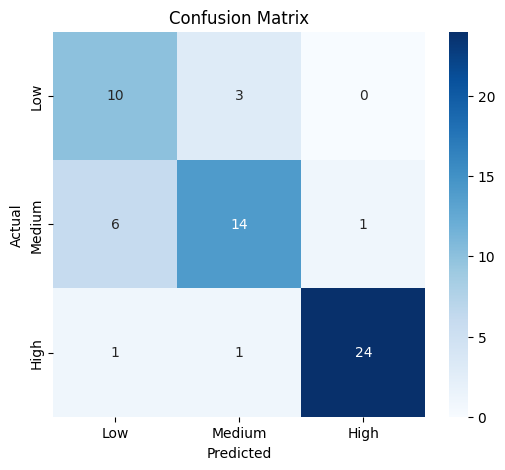

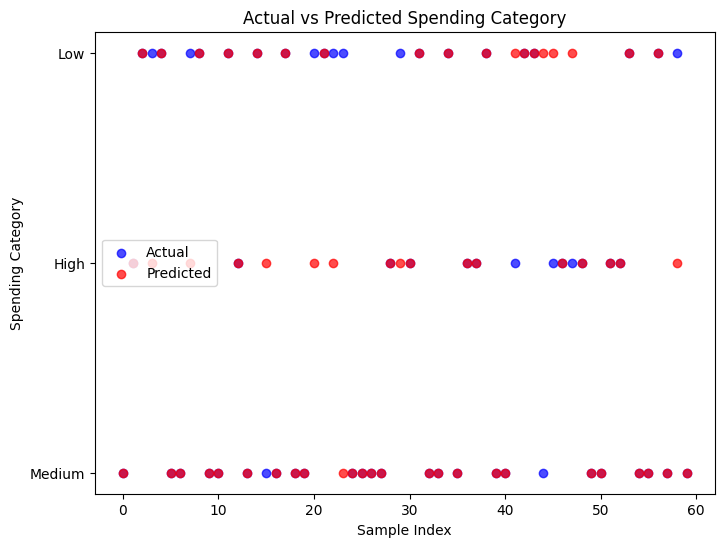

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Use your dataset
data = ps.copy()

# Encode Genre if categorical
if data['Genre'].dtype == 'object':
    data['Genre'] = data['Genre'].map({'Male': 0, 'Female': 1})

# Convert Spending Score into categories for classification
data['Spending_Category'] = pd.cut(data['Spending Score (1-100)'],
                                   bins=[0, 40, 70, 100],
                                   labels=['Low', 'Medium', 'High'])

# Features - use more than just Genre for better accuracy
features = ['Genre']
if 'Annual Income (k$)' in data.columns:
    features.append('Annual Income (k$)')
if 'Age' in data.columns:
    features.append('Age')

X = data[features]
y = data['Spending_Category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Classifier with tuning
model = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=5,
                               min_samples_leaf=2, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Accuracy & metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='red', alpha=0.7)
plt.title('Actual vs Predicted Spending Category')
plt.xlabel('Sample Index')
plt.ylabel('Spending Category')
plt.legend()
plt.show()